In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import RegexpTokenizer, FreqDist
from nltk.corpus import stopwords
from wordcloud import wordcloud, WordCloud, ImageColorGenerator
import numpy as np
import re
from PIL import Image


In [2]:
data = pd.read_csv("mdc_clean.csv", encoding='utf8')


In [3]:
text = data.loc[:,['title','year','genre1','genre2','genre3','mpa_rating','director','stars1','star2','star3','description','crit_consensus','entity']]
text.head()

,title,year,genre1,genre2,genre3,mpa_rating,director,stars1,star2,star3,description,crit_consensus,entity
0,Howard the Duck,1986,Action,Adventure,Comedy,PG,Willard Huyck,Willard Huyck,Lea Thompson,Jeffrey Jones,A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",MARVEL
1,Blade,1998,Action,Horror,Sci-Fi,R,Stephen Norrington,Stephen Norrington,Wesley Snipes,Stephen Dorff,"A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",MARVEL
2,X-Men,2000,Action,Adventure,Sci-Fi,PG-13,Bryan Singer,Bryan Singer,Patrick Stewart,Hugh Jackman,In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",MARVEL
3,Blade II,2002,Action,Fantasy,Horror,R,Guillermo del Toro,Guillermo del Toro,Wesley Snipes,Kris Kristofferson,Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,MARVEL
4,Spider-Man,2002,Action,Adventure,Sci-Fi,PG-13,Sam Raimi,Sam Raimi,Tobey Maguire,Kirsten Dunst,"When bitten by a genetically modified spider, ...",Not only does Spider-Man provide a good dose o...,MARVEL


In [4]:
marvel = text[text['entity'] == "MARVEL"]
marvel = marvel.astype(str)
marvel.to_csv('marvel_text.csv')
DC = text[text['entity'] == "DC"]
DC = DC.astype(str)
DC.to_csv('dc_text.csv')

In [5]:
marvel.head()

,title,year,genre1,genre2,genre3,mpa_rating,director,stars1,star2,star3,description,crit_consensus,entity
0,Howard the Duck,1986,Action,Adventure,Comedy,PG,Willard Huyck,Willard Huyck,Lea Thompson,Jeffrey Jones,A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",MARVEL
1,Blade,1998,Action,Horror,Sci-Fi,R,Stephen Norrington,Stephen Norrington,Wesley Snipes,Stephen Dorff,"A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",MARVEL
2,X-Men,2000,Action,Adventure,Sci-Fi,PG-13,Bryan Singer,Bryan Singer,Patrick Stewart,Hugh Jackman,In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",MARVEL
3,Blade II,2002,Action,Fantasy,Horror,R,Guillermo del Toro,Guillermo del Toro,Wesley Snipes,Kris Kristofferson,Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,MARVEL
4,Spider-Man,2002,Action,Adventure,Sci-Fi,PG-13,Sam Raimi,Sam Raimi,Tobey Maguire,Kirsten Dunst,"When bitten by a genetically modified spider, ...",Not only does Spider-Man provide a good dose o...,MARVEL


In [6]:

col_number = marvel.shape[1]
row_number = marvel.shape[0]

In [7]:
stop_words = stopwords.words('english')
stop_words = list(set(stopwords.words('english')))

In [9]:
tokenizer = RegexpTokenizer(r'\w+')
for i in range(row_number):
    for j in range(col_number):
        clean_words = tokenizer.tokenize(marvel.iloc[i, j])
        clean_words = [i for i in clean_words if i not in stop_words]
        clean_words = [i for i in clean_words if len(i) > 3 & len(i) < 11]
        data.iloc[i, j] = ' '.join(clean_words)

str = ""
for i in range(row_number):
    for j in range(2):
        str += " " + data.iloc[i, j]
str = str.lower()


AttributeError: 'list' object has no attribute 'to_csv'

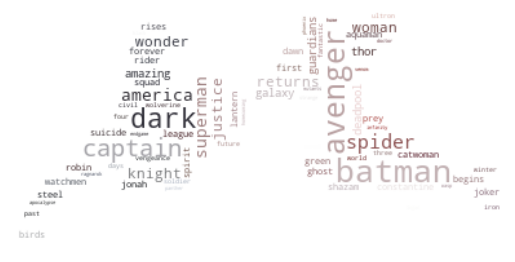

In [21]:
mask = np.array(Image.open("civilwar.jpg"))
wordcloud = WordCloud(mask = mask,colormap= 'Pastel1',background_color="white",width=1987, height=736).generate(str)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.savefig("marvel_wc")
plt.show()



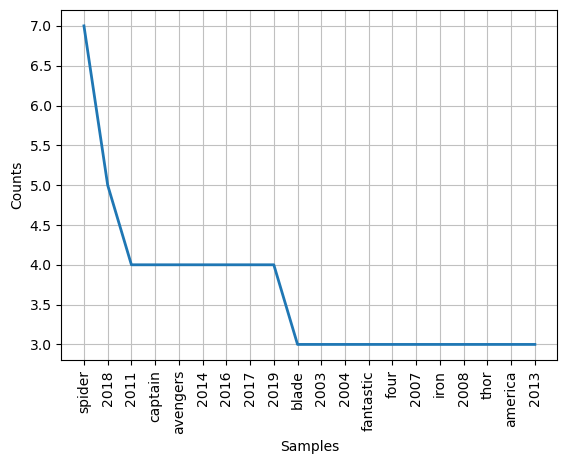

In [10]:
fig = plt.figure()
plt.gcf().subplots_adjust(bottom=0.15)
fdist = FreqDist(str.split())
fdist.plot(20, cumulative=False)
plt.show()
fig.savefig('freqDist.png', bbox_inches = "tight")

In [11]:

col_number1 = DC.shape[1]
row_number1 = DC.shape[0]

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
for i in range(row_number1):
    for j in range(col_number1):
        clean_words = tokenizer.tokenize(DC.iloc[i, j])
        clean_words = [i for i in clean_words if i not in stop_words]
        clean_words = [i for i in clean_words if len(i) > 3 & len(i) < 11]
        data.iloc[i, j] = ' '.join(clean_words)

str = ""
for i in range(row_number):
    for j in range(2):
        str += " " + data.iloc[i, j]
str = str.lower()


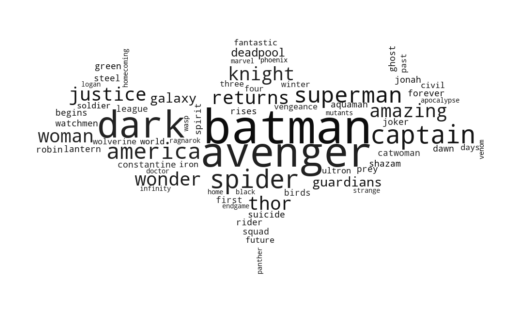

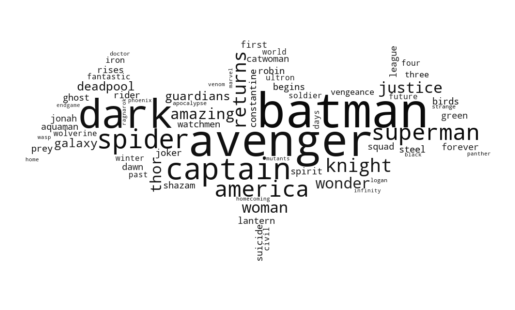

In [19]:
batman_mask = np.array(Image.open("Batman.jpg"))
# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", mask=batman_mask,
               width=1987, height=736, colormap=cmap)
wc.generate(str)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("dc_wc")
plt.show()

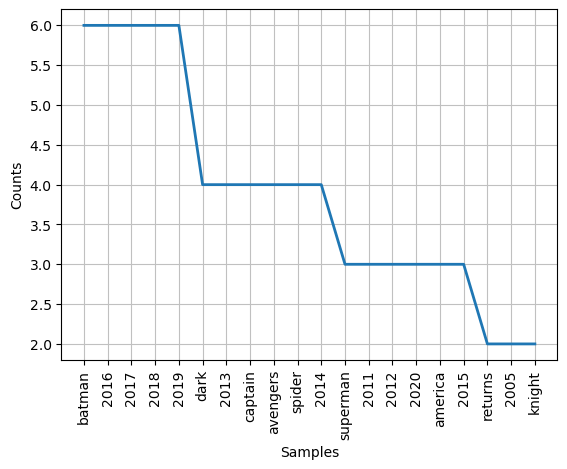

In [20]:
fig = plt.figure()
plt.gcf().subplots_adjust(bottom=0.15)
fdist = FreqDist(str.split())
fdist.plot(20, cumulative=False)
plt.show()
fig.savefig('freqDist_Dc.png', bbox_inches = "tight")
